Random Walk Generation

$$
\frac{S_{t+dt} - S_t}{S_t} = \mu dt+\sigma \sqrt{dt}\xi_t
$$

In [10]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using geometric brownian motion
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [17]:
p = gbm(10,n_scenarios=3)

In [18]:
p.shape

(120, 3)

In [19]:
p.head()

,0,1,2
0,92.664968,106.976367,101.165344
1,87.707028,110.938362,104.541435
2,86.103496,113.561279,103.026349
3,87.119350,112.605800,106.195588
4,85.649788,119.649411,110.504913


<AxesSubplot:>

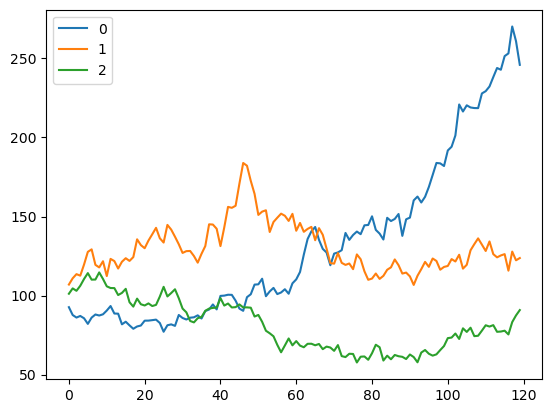

In [20]:
p.plot()

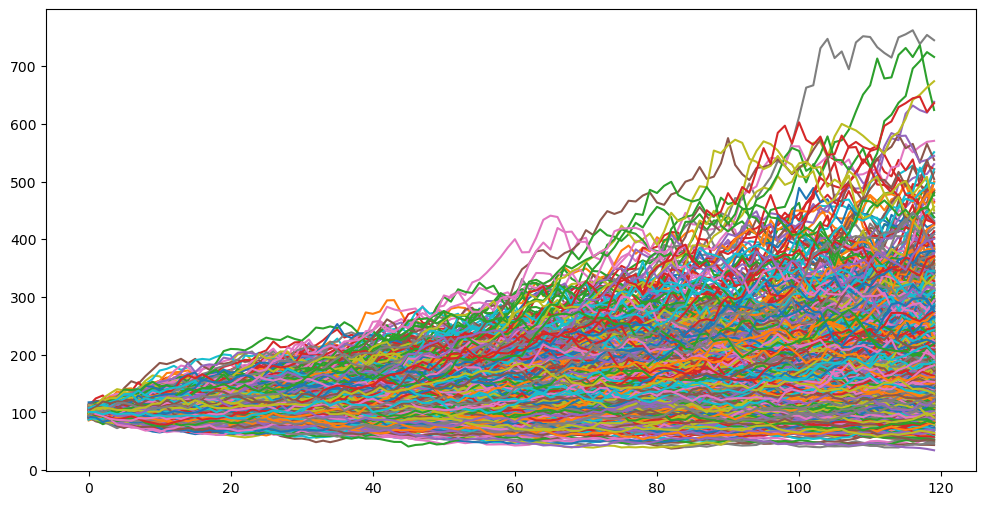

In [22]:
p=gbm(n_years=10,n_scenarios=1000).plot(figsize=(12,6),legend=False)

In [23]:
p=gbm(n_years=10,n_scenarios=1000)

In [33]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using geometric brownian motion
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using geometric brownian motion
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [34]:
%timeit gbm0(n_years=5,n_scenarios=1000)

1.77 ms ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%timeit gbm1(n_years=5,n_scenarios=1000)

1.64 ms ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<AxesSubplot:>

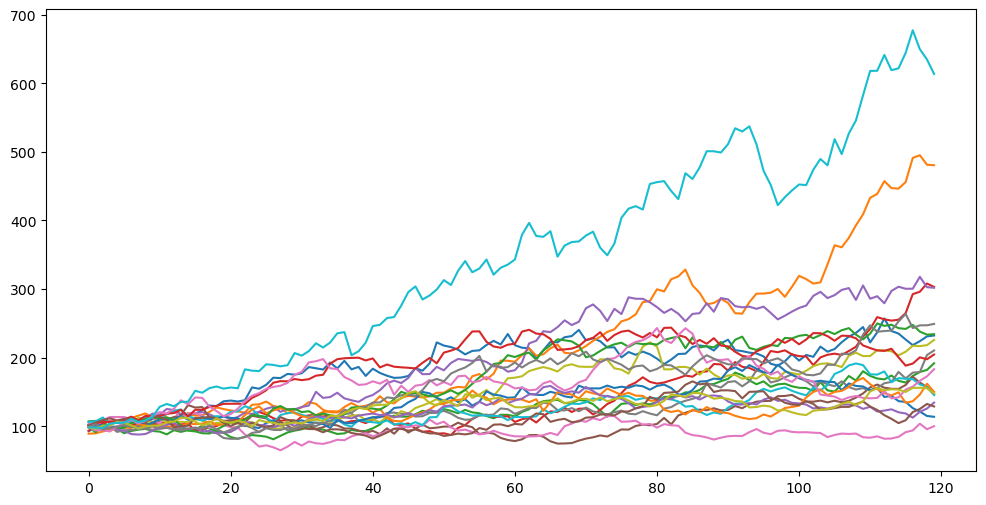

In [37]:
gbm1(n_years=10,n_scenarios=20).plot(figsize=(12,6),legend=False)

In [38]:
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using geometric brownian motion
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

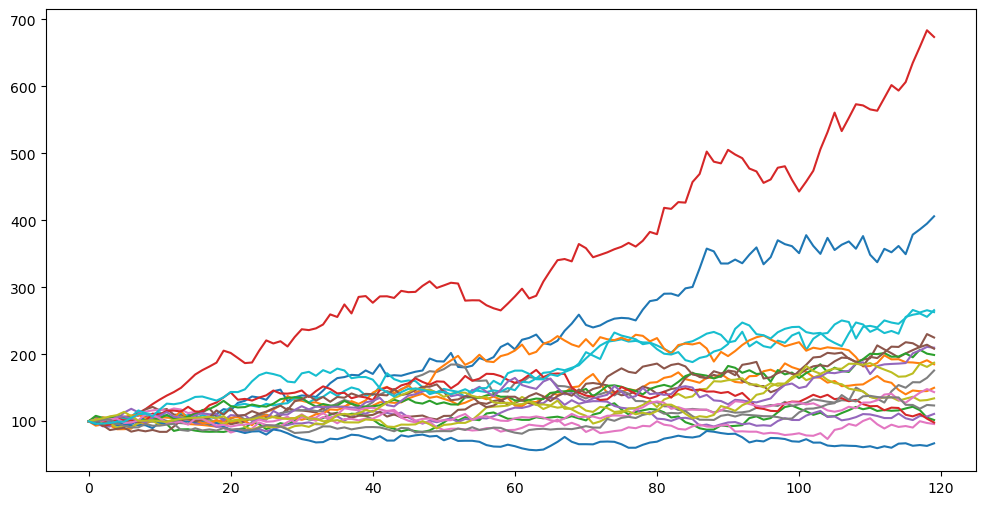

In [39]:
gbm1(n_years=10,n_scenarios=20).plot(figsize=(12,6),legend=False)

In [41]:
gbm1(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,102.724614,94.962467,105.409433,102.751064,103.136235,100.505110,97.090708,99.178800,97.158303,107.078580
2,100.465026,97.010120,98.057117,101.527476,102.576662,101.031542,102.014202,95.860113,94.600127,113.504139
3,108.126298,93.361769,106.187601,102.548052,107.274903,100.872801,111.152864,98.960918,98.612919,103.033849
4,113.635178,93.485476,101.938819,94.830261,112.130748,99.320677,105.875372,103.014908,96.940547,104.637195
